# TSIA202a - Second Practice Session : Spectral density estimation and periodogram
The goal of this second session is to provide a power spectral density estimator of a real, zero-mean, weakly stationary process $X_t$. We suppose that we have access to $n$ observations and we will use the FFT algorithm (that implements the DFT) using `numpy.fft.module`.
Recall (from the course) that the periodogram of the observations $X_0, \dots, X_{n-1}$ can be given as:
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2
$$

Moreover, the Hertglotz theorem provides a relation between the empirical autocovariance $\hat{\gamma}_n$ and the periodogram $I_n$:
$$
\hat{\gamma}_n(k) = \int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda
$$

1. For a given $m \geq n$  we denote also the DFT as:
$$
DFT(X,m)(k) = \sum_{h=0}^{n-1}X_he^{-2i\pi\frac{kh}{m}}
$$
Show the following relation: 
$$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$
2. provide a script that compute those $I_n(\frac{2\pi k}{m})$ for the time series mentioned in the first practice session
3. Show that $I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$
4. How to choose $m$ in order to get a simple relation between $\hat{\gamma}_n(k)$ and $I_n(\frac{2\pi k}{m})$ ? At the end, given a specific $\tilde{m}$ show that:
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$ Try this estimator on the autocovariance of previous time series of the first session.

5. In the case of white noise, estimate the variance of the periodogram for several values of $n$ and discuss about it.




---

### $\textbf{\textcolor{Goldenrod}{Question 1:}}$
1. Soit $m \geq n$, on a :
$$
DFT(X,m)(k) = \sum_{h=0}^{n-1} X_h e^{-2i\pi \frac{kh}{m}}.
$$
et
$$
I_n\left(\frac{2\pi k}{m}\right) = \frac{1}{2\pi n} \left|\sum_{h=0}^{n-1} X_h e^{i \frac{2\pi k}{m} h}\right|^2.
$$

Or, pour tout $z \in \mathbb{C}$, $e^{i\theta} = \overline{e^{-i\theta}}$. Donc :
$$
\sum_{h=0}^{n-1} X_h e^{i \frac{2\pi k}{m} h} = \overline{DFT(X,m)(k)}.
$$

Ainsi,
$$
\left|\sum_{h=0}^{n-1} X_h e^{i \frac{2\pi k}{m} h}\right|^2 = \left|\overline{DFT(X,m)(k)}\right|^2.
$$

Or, pour tout $z \in \mathbb{C}$, $\left|\overline{z}\right| = \left|z\right|$. D'où :
$$
\left|\overline{DFT(X,m)(k)}\right|^2 = \left|DFT(X,m)(k)\right|^2.
$$

D'où:
$$
\textbf{\textcolor{Goldenrod}{\boxed{I_n\left(\frac{2\pi k}{m}\right) = \frac{1}{2\pi n} \left|DFT(X,m)(k)\right|^2}}}
$$


---

### $\textbf{\textcolor{Goldenrod}{Question 2:}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Génération des séries temporelles et calcul de périodogrammes.

def white_noise(n, sigma):
       return np.random.normal(0, sigma, n)


def process_1(n, a=0, b=1, sigma=1):
    Z_t = white_noise(n + 1, sigma)
    return a + b * Z_t[1:] + Z_t[:-1]


def process_2(n, K=5, a=0, sigma=1):
    Z_t = white_noise(n + K, sigma)
    weights = [2 ** -k for k in range(K + 1)]
    X_t = np.convolve(Z_t, weights, mode='valid')
    return X_t + a


def harmonic_process(n, A0=1, lambda0=np.pi/4, sigma=1):

    Z_t = white_noise(n, sigma)
    Phi0 = np.random.uniform(0, 2 * np.pi)
    t = np.arange(n)
    X_t = A0 * np.cos(lambda0 * t + Phi0) + Z_t
    return X_t


def compute_periodogram(X, m):
    n = len(X)
    DFT = np.fft.fft(X, n=m)
    frequencies = np.fft.fftfreq(m, d=1)
    I_n = (1 / (2 * np.pi * n)) * np.abs(DFT) ** 2
    return frequencies[:m // 2], I_n[:m // 2]




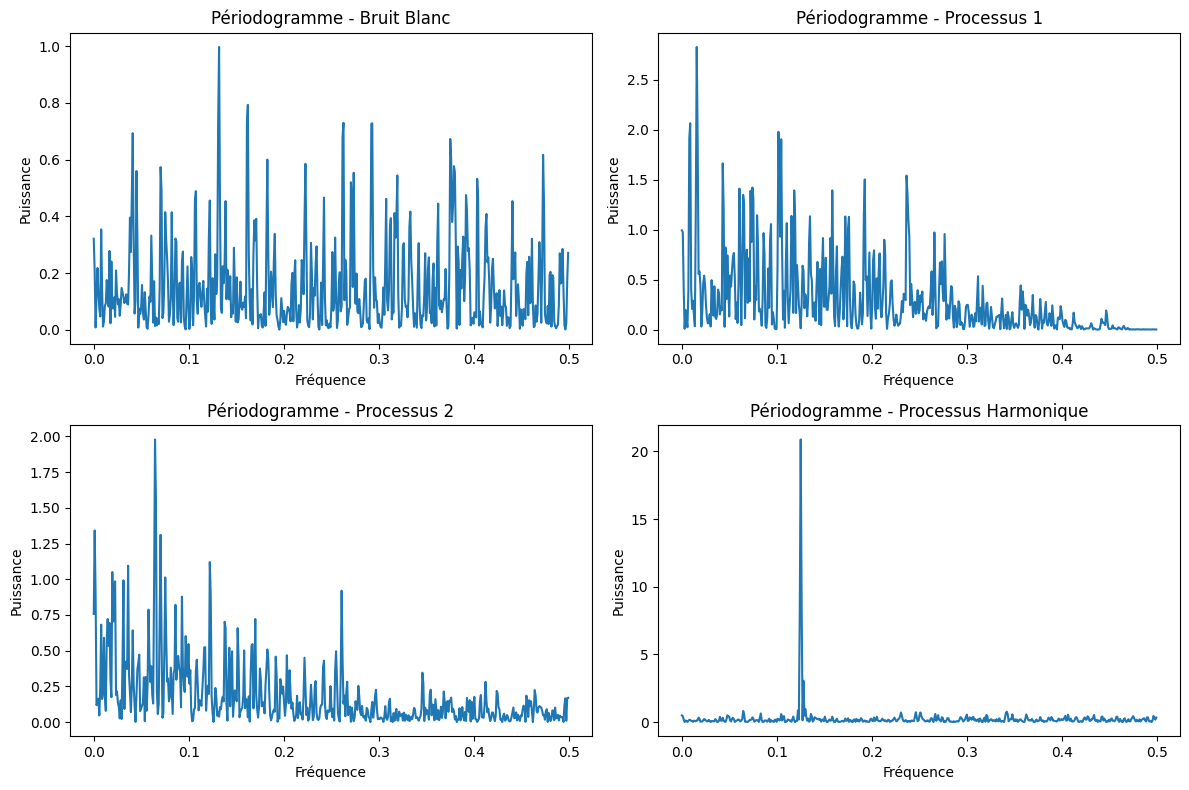

In [2]:
n = 500  
m = 1024  


X_wn = white_noise(n, sigma=1)
X_p1 = process_1(n)
X_p2 = process_2(n, K=10)
X_harmonic = harmonic_process(n)

# Calcule des périodogrammes
freq_wn, I_wn = compute_periodogram(X_wn, m)
freq_p1, I_p1 = compute_periodogram(X_p1, m)
freq_p2, I_p2 = compute_periodogram(X_p2, m)
freq_harmonic, I_harmonic = compute_periodogram(X_harmonic, m)


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(freq_wn, I_wn)
plt.title("Périodogramme - Bruit Blanc")
plt.xlabel("Fréquence")
plt.ylabel("Puissance")

plt.subplot(2, 2, 2)
plt.plot(freq_p1, I_p1)
plt.title("Périodogramme - Processus 1")
plt.xlabel("Fréquence")
plt.ylabel("Puissance")

plt.subplot(2, 2, 3)
plt.plot(freq_p2, I_p2)
plt.title("Périodogramme - Processus 2")
plt.xlabel("Fréquence")
plt.ylabel("Puissance")

plt.subplot(2, 2, 4)
plt.plot(freq_harmonic, I_harmonic)
plt.title("Périodogramme - Processus Harmonique")
plt.xlabel("Fréquence")
plt.ylabel("Puissance")

plt.tight_layout()
plt.show()


---

### $\textbf{\textcolor{Goldenrod}{Question 3:}}$


On a : 
$$
\hat{\gamma}_n(k) = \int_{0}^{2\pi} e^{i\tau k} I_n(\tau) d\tau.
$$

Donc:
$$
\hat{\gamma}_n(k) e^{-i\lambda k} = \int_{0}^{2\pi} e^{i\tau k} e^{-i\lambda k} I_n(\tau) d\tau = \int_{0}^{2\pi} e^{i(\tau - \lambda)k} I_n(\tau) d\tau
$$

Donc on a:
$$
\frac{1}{2\pi}\sum_{k=0}^{n-1} \hat{\gamma}_n(k) e^{-i\lambda k} = \frac{1}{2\pi}\sum_{k=0}^{n-1} \int_{0}^{2\pi} e^{i(\tau - \lambda)k} I_n(\tau) d\tau 
$$
Or On sait que :
$$
I_n(\lambda) = \frac{1}{2\pi n} \left| \sum_{k=0}^{n-1} X_k e^{i\lambda k} \right|^2
$$


$$
\hspace{3.38cm}= \frac{1}{2\pi n} \left( \sum_{p=0}^{n-1} X_p e^{i\lambda p} \right) \left( \sum_{q=0}^{n-1} X_q e^{-i\lambda q} \right)
$$

$$
\hspace{5.5cm}= \frac{1}{2\pi n} \sum_{p=0}^{n-1} \sum_{q=0}^{n-1} X_p X_q e^{i\lambda (p-q)} \hspace{3cm} (1)
$$

donc: 
$$
\frac{1}{2\pi}\sum_{k=0}^{n-1} \hat{\gamma}_n(k) e^{-i\lambda k} = \frac{1}{2\pi}\sum_{k=0}^{n-1} \int_{0}^{2\pi} \left (e^{i(\tau - \lambda)k} \left (\frac{1}{2\pi n} \sum_{p=0}^{n-1} \sum_{q=0}^{n-1} X_p X_q e^{i\tau (p-q)}\right) \right)d\tau.
$$

$$
=\frac{1}{2\pi}\sum_{k=0}^{n-1} \frac{1}{2\pi n} \sum_{p=0}^{n-1} \sum_{q=0}^{n-1} X_p X_q e^{-i\lambda k}\int_{0}^{2\pi} e^{i\tau (k + p - q)}d\tau.
$$

Or 
$$
\int_{0}^{2\pi} e^{i\lambda (k + p - q)} d\lambda =
\begin{cases}
2\pi, & \text{si } k + p - q = 0, \\
0, & \text{sinon.}
\end{cases}
$$

donc : 
$$
\frac{1}{2\pi}\sum_{k=0}^{n-1} \hat{\gamma}_n(k) e^{-i\lambda k} = \frac{1}{2\pi n} \sum_{p=0}^{n-1} \sum_{q=0}^{n-1} X_p X_q e^{i\lambda (p-q)}
$$

Donc, d'après $(1)$ 

$$
\textbf{\textcolor{Goldenrod}{\boxed{I_n(\lambda) = \frac{1}{2\pi}\sum_{k=0}^{n-1} \hat{\gamma}_n(k) e^{-i\lambda k}}}}
$$




---

### $\textbf{\textcolor{Goldenrod}{Question 4:}}$
$$
I_n(\lambda) = \frac{1}{2\pi}\sum_{k=0}^{n-1} \hat{\gamma}_n(k) e^{-i\lambda k}
$$

Donc: 
$$
I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi}\sum_{l=0}^{n-1} \hat{\gamma}_n(l) e^{-i \frac{2\pi k}{m} l}
$$

$$
\implies 2\pi I_n(\frac{2\pi k}{m}) = \sum_{l=0}^{n-1} \hat{\gamma}_n(l) e^{-i \frac{2\pi k}{m} l}
$$

Donc, la fonction d’autocovariance s’obtient via l’inverse DFT si m égale la longueur de la séquence $\hat{\gamma}_n$ soit donc $m=n$. 

Dans ce cas, $\forall  k \in \llbracket 0, n-1 \rrbracket$,
$$
\hat{\gamma}_n (k) = IDTF\left[2 \pi I_n(\frac{2 \pi h}{m})\right]
$$
$$
\hspace{3.4cm}= IDTF \left(2 \pi \frac{1}{2\pi n} |DFT(X,n)|^2, n \right) (k)
$$
Ainsi: 
$$
\textbf{\textcolor{Goldenrod}{\boxed{\hat{\gamma}_n (k) = \frac{1}{n} IDTF \left(|DFT(X,n)|^2, n \right) (k)}}}
$$

---

### $\textbf{\textcolor{Goldenrod}{Question 5:}}$


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


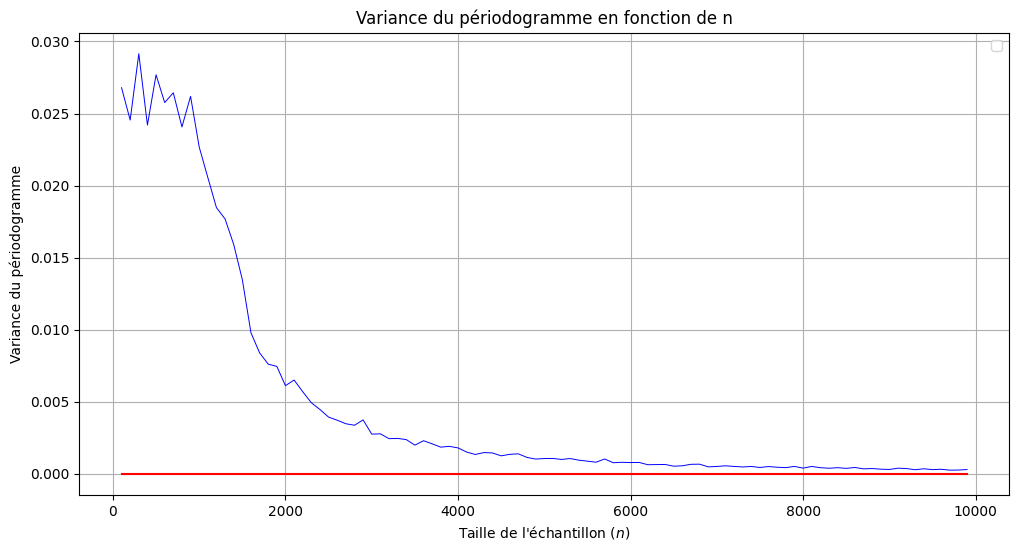

In [3]:

def estimate_periodogram_variance(n_values, m, num_realizations, freq_index):
    variances = []
    for n in n_values:
        periodograms = []
        for _ in range(num_realizations):
            X = white_noise(n, sigma=1)
            DFT = np.fft.fft(X, n=m)
            I_n = (1 / (2 * np.pi * n)) * np.abs(DFT)**2
            periodograms.append(I_n[freq_index])  
        variances.append(np.var(periodograms))
    return variances

n_values = np.arange(100, 10000, 100)  
m = 1024  
num_realizations = 1000  
freq_index = m // 4  

variances = estimate_periodogram_variance(n_values, m, num_realizations, freq_index)

plt.figure(figsize=(12, 6))
plt.plot(n_values, [0] * len(n_values), color="red")
plt.plot(n_values, variances, color="blue", linewidth=0.7)
plt.title("Variance du périodogramme en fonction de n")
plt.xlabel("Taille de l'échantillon ($n$)")
plt.ylabel("Variance du périodogramme")
plt.grid()
plt.legend()
plt.show()



On voit que la variance du périodogramme diminue rapidement avec l'augmentation de la taille de l'échantillon $ n $, confirmant que les estimations spectrales deviennent plus stables avec davantage de données.

Au-delà d’un certain seuil ($ n \approx 6000 $), la variance devient presque nulle, indiquant que les gains supplémentaires en précision sont négligeables pour des tailles d’échantillon très grandes.
